In [1]:
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import scipy.stats as ss
import itertools
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import LeaveOneOut
import mifs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import scipy
import numpy as np, scipy.stats as st
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from scipy import interp
from collections import Counter
# import warnings filter
from warnings import simplefilter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import balanced_accuracy_score

from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.metrics import geometric_mean_score

Using TensorFlow backend.
/home/shayantan/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shayantan/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shayantan/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shayantan/miniconda3/lib/python3.6/sit

In [2]:
dat=pd.read_table('Diabetes.txt')

In [3]:
dat.shape

(86454, 9)

In [4]:
dat.head(3)

,Diabetes,Retinopathy,BMI,Waist.Circumference,Gender,Age,Ethnicity,Education.adult.,Marital.Status
0,2,2,14.90,45.7,2,2,4,3,5
1,2,2,24.90,98.0,1,77,3,5,1
2,2,2,17.63,64.7,2,10,3,5,5


In [5]:
dat=pd.get_dummies(dat,columns=['Gender','Ethnicity','Education.adult.','Marital.Status','Retinopathy'])

In [6]:
dat.shape

(86454, 29)

In [7]:
dat.Diabetes=dat.Diabetes.astype('category')
x=dat.drop('Diabetes',axis=1)
y=dat.Diabetes

In [8]:
x.head(3)

,BMI,Waist.Circumference,Age,Gender_1,Gender_2,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,...,Marital.Status_2,Marital.Status_3,Marital.Status_4,Marital.Status_5,Marital.Status_6,Marital.Status_77,Marital.Status_99,Retinopathy_2,Retinopathy_7,Retinopathy_9
0,14.90,45.7,2,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,24.90,98.0,77,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,17.63,64.7,10,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [9]:
y.value_counts()

2    80924
1     5530
Name: Diabetes, dtype: int64

In [10]:
#removing outliers
potential_outliers = []
from collections import Counter
from IPython.display import display

# For each feature find the data points with extreme high or low values
for feature in x.keys():

    # Calculate Q1
    Q1 = np.percentile(x[feature], 25)
    
    # Calculate Q3
    Q3 = np.percentile(x[feature], 75)
    
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    outlier = x[~((x[feature] >= Q1 - step) & (x[feature] <= Q3 + step))]
    potential_outliers += outlier.index.tolist()
    
# print Counter(potential_outliers)
# len({k:v for (k,v) in Counter(potential_outliers).items() if v > 4})
outliers = [k for (k,v) in Counter(potential_outliers).items() if v > 4]

In [11]:
vital_patient_info = x[~x.index.isin(outliers)]
y_lab=y[~y.index.isin(outliers)]

In [12]:
vital_patient_info.shape

(86428, 28)

In [13]:
#splitting into train/test
X_train, X_test, y_train, y_test = train_test_split(vital_patient_info, y_lab, test_size=0.3, random_state=42, stratify=y_lab)

In [16]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

### Model building using classifiers
### 1. SVM
### 2. Decision trees
### 3. Random forests
### 4. Logistic regression
### 5. Multilayer perceptron

### Tuning the parameters on the training data

In [35]:
#SVM
#tuning parameters for SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid_svm = GridSearchCV(SVC(), param_grid,cv=3) 
  
# fitting the model for grid search 
svm=grid_svm.fit(X_train_scaled, y_train) 
print('SVM params\n')
print(svm.best_params_)


SVM params

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [36]:
#RF
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid,cv=3) 
rf=grid_rf.fit(X_train_scaled, y_train) 
print('RF smote params\n')
print(rf.best_params_)



RF smote params

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [37]:
# Logit
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
grid_lr = GridSearchCV(LogisticRegression(), hyperparameters)
lr_sm=grid_lr.fit(X_train_scaled, y_train) 
print('Logit ros params\n')
print(lr_sm.best_params_)


Logit ros params

{'C': 1.0, 'penalty': 'l2'}


In [38]:
#DT
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid_dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters)
dt_ros=grid_dt.fit(X_train_scaled,y_train)
print('DT params\n')
print(dt_ros.best_params_)

DT params

{'max_depth': 19, 'min_samples_split': 10}


In [39]:
#Multilayer perceptron
parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,100), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(), parameter_space)
mlp_sm=grid_mlp.fit(X_train_scaled,y_train)
print('MLP smote params\n')
print(mlp_sm.best_params_)


/home/shayantan/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shayantan/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shayantan/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/shayantan/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

MLP smote params

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}


### Training the classifiers on the data with the tuned parameters

In [47]:
# Instantiate the classfiers and make a list
classifiers = [ SVC(C= 0.1, gamma= 1, kernel= 'linear',probability=True),
               RandomForestClassifier(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200),
               LogisticRegression(C=1,penalty='l2'),
               DecisionTreeClassifier(max_depth=19,min_samples_split=10),
               MLPClassifier(activation='tanh',alpha=0.05,hidden_layer_sizes=(100,),learning_rate='adaptive',solver='sgd')
               
    
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and record the results
for cls in classifiers:
    feat=[]
    model = cls.fit(X_train_scaled, y_train)
    print("Classifier ",cls)
    print(classification_report(y_test,model.predict(X_test_scaled)))
    yproba = model.predict_proba(X_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba,pos_label=2)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    
result_table.set_index('classifiers', inplace=True)


Classifier  SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           1       1.00      0.01      0.02      1655
           2       0.94      1.00      0.97     24274

    accuracy                           0.94     25929
   macro avg       0.97      0.50      0.49     25929
weighted avg       0.94      0.94      0.91     25929

Classifier  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_

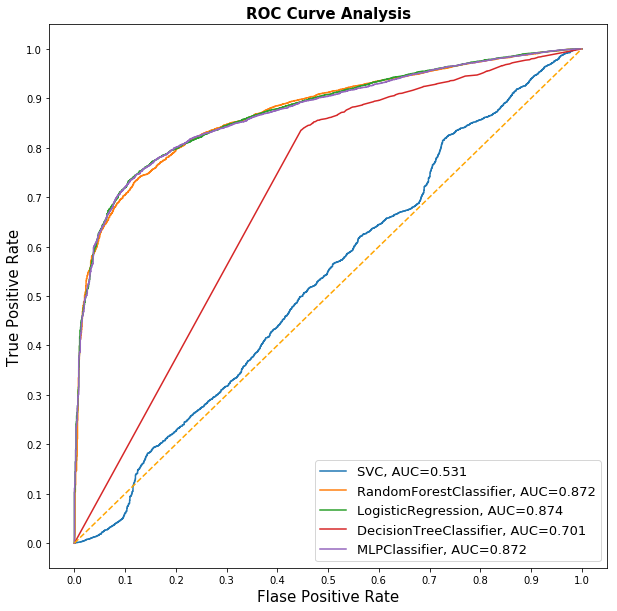

In [48]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Ensemble methods:
### 1. Bagging
### 2. Balanced Bagging
### 3. Balanced Random forest classifier
### 4. Easy Ensemble classifier
### 5. RUSBoost classifier
### 6. AdaBoost
### 7. Gradient Boost

### _________

### Tuning the classifiers

In [40]:
#parameter tuning using training set for bagging 
params = {'n_estimators': [10,100,200,400,500], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1)

# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)
bc_grid.fit(X_train_scaled, y_train)
best_params = bc_grid.best_params_
print(best_params)


{'base_estimator__max_depth': 4, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 500}


In [41]:
#parameter tuning using training set for balanced bagging 
params = {'n_estimators': [10,100,200,400,500], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
bbc = BalancedBaggingClassifier(base_estimator=dt, oob_score=True, random_state=1)

# Grid Search to determine best parameters
bbc_grid = GridSearchCV(estimator=bbc, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)
bbc_grid.fit(X_train_scaled, y_train)
best_params = bbc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 400}


In [42]:
#parameter tuning for random forests
param_grid = { 
    'n_estimators': [100,200,300,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
brc=BalancedRandomForestClassifier()

# Grid Search to determine best parameters
brc_grid = GridSearchCV(estimator=brc, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
brc_grid.fit(X_train_scaled, y_train)
best_params = brc_grid.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 700}


In [43]:
#parameter tuning using training set for Easy ensemble
params = {'n_estimators': [10,100,200,400,500], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
ee = EasyEnsembleClassifier(base_estimator=dt, random_state=1) 
# Grid Search to determine best parameters
eec_grid = GridSearchCV(estimator=ee, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)
eec_grid.fit(X_train_scaled, y_train)
best_params = eec_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 500}


In [44]:
#parameter tuning using training set for RUSBOOST
params = {'n_estimators': [10,100,200,400,500], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
rus = RUSBoostClassifier(base_estimator=dt, random_state=1) 
# Grid Search to determine best parameters
rus_grid = GridSearchCV(estimator=rus, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1)
rus_grid.fit(X_train_scaled, y_train)
best_params = rus_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 10, 'n_estimators': 10}


In [45]:
#parameter tuning using training set for AdaBOOST

param_grid = {"n_estimators": [100, 200, 300]
              
             }
dt = DecisionTreeClassifier()
ABC = AdaBoostClassifier(base_estimator=dt,random_state=1)
# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc',cv=5)
grid_search_ABC.fit(X_train_scaled,y_train)
best_params=grid_search_ABC.best_params_
print(best_params)

{'n_estimators': 100}


In [ ]:
#parameter tuning using training set for Gradient Boosting

parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[100,200,300]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1,scoring="roc_auc")

clf.fit(X_train_scaled, y_train)
print(clf.best_params_)


In [49]:
base_estimator=AdaBoostClassifier(n_estimators=500)
base_est=DecisionTreeClassifier(max_depth=6,max_leaf_nodes=15)
# Instantiate the classfiers and make a list
classifiers = [BaggingClassifier(DecisionTreeClassifier(max_depth= 4, max_leaf_nodes= 15), n_estimators= 500), 
               BalancedBaggingClassifier(DecisionTreeClassifier(max_depth= 6, max_leaf_nodes= 15), n_estimators= 400), 
               BalancedRandomForestClassifier(criterion='entropy', max_depth= 8, max_features= 'auto', n_estimators= 700), 
              EasyEnsembleClassifier(n_estimators= 500),
                RUSBoostClassifier(base_estimator, n_estimators= 100),
               AdaBoostClassifier(n_estimators=100),
               GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.01, max_depth=5, max_features='sqrt', n_estimators=300)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and record the results
for cls in classifiers:
    feat=[]
    model = cls.fit(X_train_scaled, y_train)
    print("Classifier ",cls)
    print(classification_report(y_test,model.predict(X_test_scaled)))
    yproba = model.predict_proba(X_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba,pos_label=2)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    
result_table.set_index('classifiers', inplace=True)


Classifier  BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=15,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'

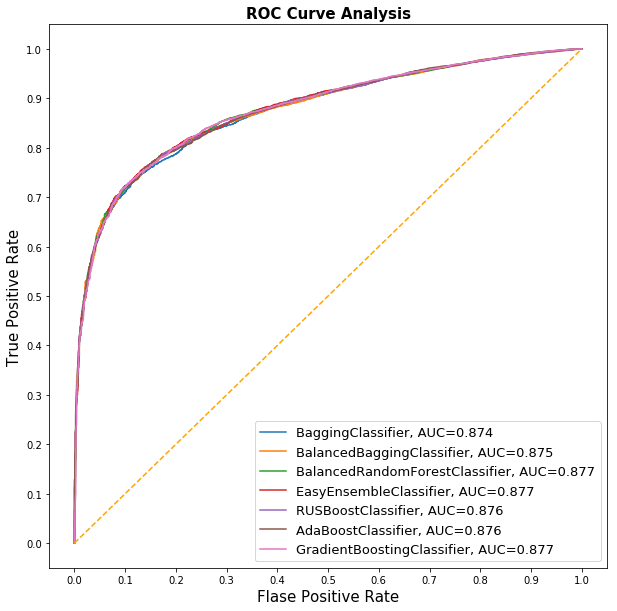

In [50]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Feature importance using Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
              "n_estimators": list(range(1,1000)),
             }

forest = RandomForestClassifier( random_state=42)

In [52]:
rand_for = RandomizedSearchCV(forest, param_grid, scoring = 'accuracy', n_iter=20, random_state=42)
_ = rand_for.fit(X_train_scaled,y_train)

In [53]:
importances = rand_for.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train_scaled.shape[1]):
    print("{}) {} {}".format(f, X_train.columns[indices[f]], importances[indices[f]]))


0) Waist.Circumference 0.2810148405143613
1) BMI 0.2807168464371853
2) Age 0.2560168603045083
3) Marital.Status_5 0.0174742959430976
4) Marital.Status_1 0.012596607104850091
5) Ethnicity_3 0.01143870340284059
6) Education.adult._4 0.011238272585874565
7) Education.adult._3 0.011140896001939812
8) Education.adult._2 0.010632983394278279
9) Ethnicity_4 0.010327952352329363
10) Gender_2 0.01024671733148843
11) Gender_1 0.01019597542815819
12) Education.adult._1 0.009980733061378642
13) Education.adult._5 0.008974806146351188
14) Marital.Status_2 0.008860413978338472
15) Ethnicity_1 0.008639138161895548
16) Marital.Status_3 0.008361604605326412
17) Ethnicity_2 0.007211477036567838
18) Ethnicity_5 0.006641034763458754
19) Marital.Status_6 0.004883327272416641
20) Marital.Status_4 0.00469731412007363
21) Retinopathy_9 0.0036984813415089995
22) Retinopathy_2 0.0036227571319261357
23) Education.adult._9 0.0005361045687138466
24) Marital.Status_77 0.00042176780338718103
25) Education.adult._7 0

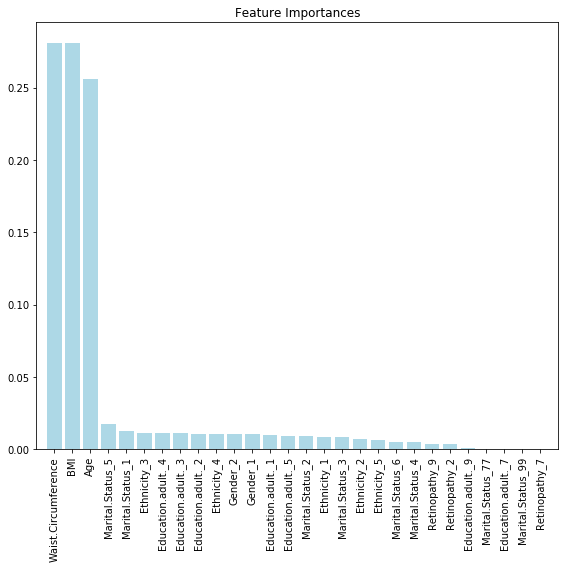

In [54]:
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

### Oversampling
### 1. Random Oversampler
### 2. SMOTE

In [17]:
rus=RandomOverSampler(random_state=0)
sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_sample(X_train_scaled, y_train.ravel())
X_train_ros,y_train_ros=rus.fit_sample(X_train_scaled,y_train.ravel())


### Parameter tuning on the oversampled training data

In [ ]:
#SVM
#tuning parameters for SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid_svm = GridSearchCV(SVC(), param_grid) 
  
# fitting the model for grid search 
svm_sm=grid_svm.fit(X_train_sm, y_train_sm) 
print('SVM smote params\n')
print(svm_sm.best_params_)





SVM smote params

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
#RF
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid) 
rf_sm=grid_rf.fit(X_train_sm, y_train_sm) 
print('RF smote params\n')
print(rf_sm.best_params_)


In [ ]:
# Logit
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
grid_lr = GridSearchCV(LogisticRegression(), hyperparameters)
lr_sm=grid_lr.fit(X_train_sm, y_train_sm) 
print('Logit smote params\n')
print(lr_sm.best_params_)



In [ ]:
#DT
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid_dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters)
dt_sm=grid_dt.fit(X_train_sm,y_train_sm)
print('DT smote params\n')
print(dt_sm.best_params_)



In [ ]:
#Multilayer perceptron
parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,100), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(), parameter_space)
mlp_sm=grid_mlp.fit(X_train_sm,y_train_sm)
print('MLP smote params\n')
print(mlp_sm.best_params_)


### Training the classifiers on the oversampled data (ROS) with the tuned parameters

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [ SVC(C= 1000, gamma= 1, kernel= 'rbf',probability=True),
               RandomForestClassifier(bootstrap= True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators= 300),
               LogisticRegression(C= 1.0, penalty= 'l1'),
               DecisionTreeClassifier(max_depth= 19, min_samples_split= 10),
               MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate='adaptive', solver='adam')
               
    
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and record the results
for cls in classifiers:
    feat=[]
    model = cls.fit(X_train_ros, y_train_ros)
    print("Classifier ",cls)
    print(classification_report(y_test,model.predict(X_test_scaled)))
    yproba = model.predict_proba(X_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba,pos_label=2)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    
result_table.set_index('classifiers', inplace=True)


In [ ]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Training the classifiers on the oversampled data (SMOTE) with the tuned parameters

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [ SVC(C= 1000, gamma= 1, kernel= 'rbf',probability=True),
               RandomForestClassifier(bootstrap= True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators= 300),
               LogisticRegression(C= 1.0, penalty= 'l1'),
               DecisionTreeClassifier(max_depth= 19, min_samples_split= 10),
               MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(50, 100), learning_rate='adaptive', solver='adam')
               
    
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and record the results
for cls in classifiers:
    feat=[]
    model = cls.fit(X_train_sm, y_train_sm)
    print("Classifier ",cls)
    print(classification_report(y_test,model.predict(X_test_scaled)))
    yproba = model.predict_proba(X_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba,pos_label=2)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    
result_table.set_index('classifiers', inplace=True)

In [ ]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Undersampling

In [58]:
from imblearn.under_sampling import RandomUnderSampler
cc = RandomUnderSampler(random_state=42,replacement=True)
X_rus, y_rus = cc.fit_resample(X_train_scaled, y_train.ravel())

### Parameter tuning on the undersampled training data

In [ ]:
#SVM
#tuning parameters for SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid_svm = GridSearchCV(SVC(), param_grid) 
  
# fitting the model for grid search 
svm_rus=grid_svm.fit(X_rus, y_rus) 
print('SVM rus params\n')
print(svm_rus.best_params_)



In [ ]:
#RF
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid) 
rf_rus=grid_rf.fit(X_rus, y_rus) 
print('RF rus params\n')
print(rf_rus.best_params_)


In [ ]:
# Logit
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
grid_lr = GridSearchCV(LogisticRegression(), hyperparameters)
lr_rus=grid_lr.fit(X_rus, y_rus) 
print('Logit rus params\n')
print(lr_rus.best_params_)

In [ ]:
#DT
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid_dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters)
dt_rus=grid_dt.fit(X_rus,y_rus)
print('DT rus params\n')
print(dt_rus.best_params_)


In [ ]:
#Multilayer perceptron
parameter_space = {
    'hidden_layer_sizes': [(50,50), (50,100), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_mlp = GridSearchCV(MLPClassifier(), parameter_space)
mlp_rus=grid_mlp.fit(X_rus,y_rus)
print('MLP rus params\n')
print(mlp_rus.best_params_)


### Training the classifiers on the undersampled data

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [ SVC(),
               RandomForestClassifier(),
               LogisticRegression(),
               DecisionTreeClassifier(),
               MLPClassifier()
               
    
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
# Train the models and record the results
for cls in classifiers:
    feat=[]
    model = cls.fit(X_train_ros, y_train_ros)
    print("Classifier ",cls)
    print(classification_report(y_test,model.predict(X_test_scaled)))
    yproba = model.predict_proba(X_test_scaled)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba,pos_label=2)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    
result_table.set_index('classifiers', inplace=True)


In [ ]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()